In [10]:
!pip install seaborn

In [39]:
# import the test_train_rsme data
import pandas as pd
data = pd.read_csv('../../logs/normalization_fix/new/train_test_rmse.csv', header=0)

In [32]:
data.describe()
data = data[data['learning_rate']==1e-5]
data.describe()

,num_processes,num_iterations,max_iterations,batch_size,learning_rate,train_rmse,test_rmse,train_time_max,train_time_avg,test_time_max,...,relu,0.0001,0.458579,0.442665,19.913539,19.913539.1,3.472444,3.472444.1,23.385984,23.385984.1
count,58.000000,58.000000,58.0,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.965517,50190.310345,1000000.0,187.586207,1.000000e-05,0.806020,0.836351,20.419107,20.419044,4.667750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.815755,52340.614890,0.0,168.844477,1.708862e-21,0.209827,0.203967,19.478127,19.478129,2.797396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2372.000000,1000000.0,32.000000,1.000000e-05,0.389244,0.451443,3.140154,3.140088,2.662956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,11765.250000,1000000.0,64.000000,1.000000e-05,0.673830,0.687488,8.449179,8.449119,3.432732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,31469.000000,1000000.0,128.000000,1.000000e-05,0.848733,0.868780,13.076006,13.075986,4.009799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,64051.750000,1000000.0,256.000000,1.000000e-05,0.960900,0.948729,26.274706,26.274706,4.487054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.000000,245720.000000,1000000.0,512.000000,1.000000e-05,1.286474,1.361126,86.639401,86.639259,17.840707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


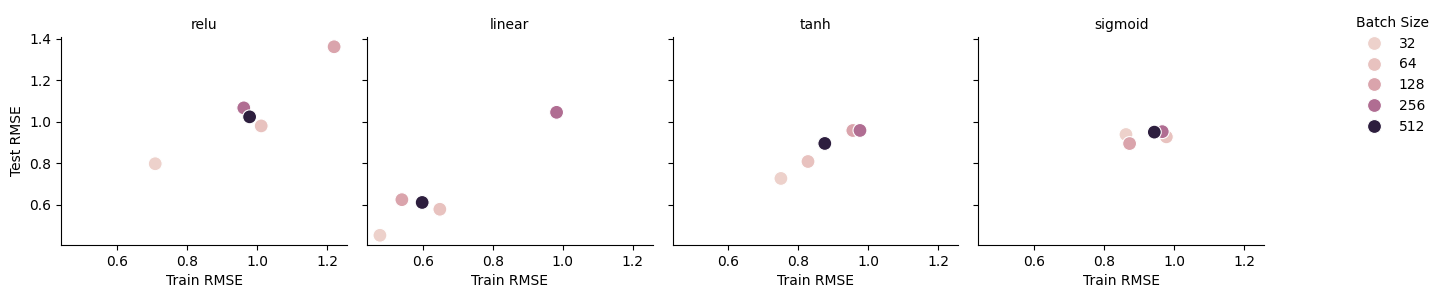

In [40]:
# plot test vs train rmse for different models
#import seaborn for plotting
# use a grid plot for each activation function by batch size 
# use different hues for different batch sizes
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data[(data['learning_rate'] == 1e-5) & (data['num_processes'] == 3)], col="activation", margin_titles=True)
g.map_dataframe(sns.scatterplot, x='train_rmse', y='test_rmse', hue='batch_size', s=100)
g.set_axis_labels("Train RMSE", "Test RMSE")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# all legend outside the plot
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
plt.show()

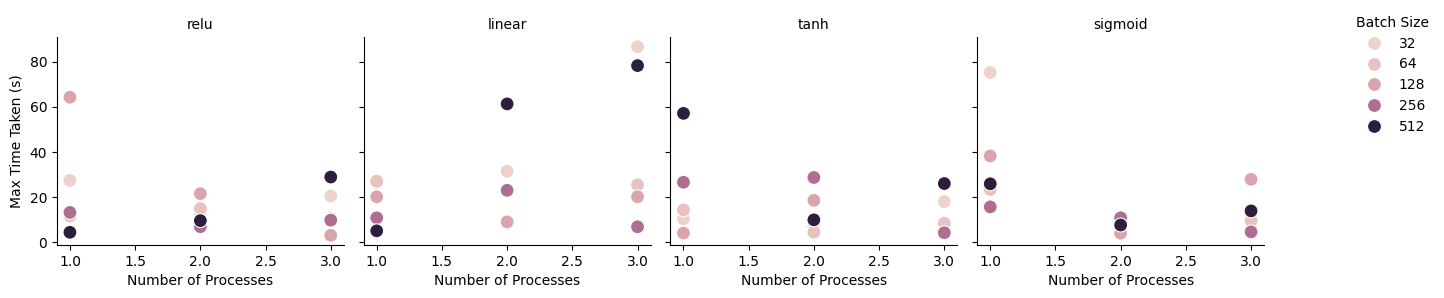

In [41]:
# plot between number of processes and max time taken for training
# use grid plot for each activation function by batch size
g = sns.FacetGrid(data[(data['learning_rate'] == 1e-5)], col="activation", margin_titles=True)
g.map_dataframe(sns.scatterplot, x='num_processes', y='train_time_max', hue='batch_size', s=100)
g.set_axis_labels("Number of Processes", "Max Time Taken (s)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
plt.show()

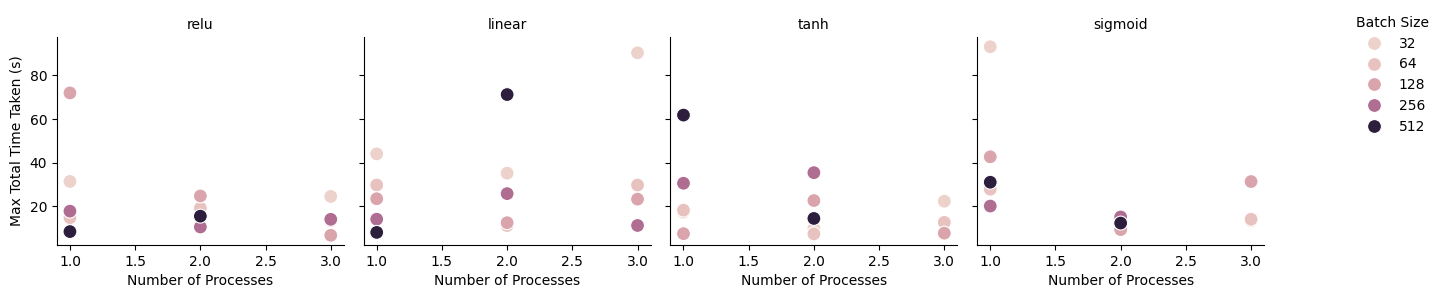

In [21]:
# plot between number of processes and avg time taken for training
# use grid plot for each activation function by batch size
g = sns.FacetGrid(data[(data['learning_rate'] == 1e-5)], col="activation", margin_titles=True)
g.map_dataframe(sns.scatterplot, x='num_processes', y='total_time_max', hue='batch_size', s=100)
g.set_axis_labels("Number of Processes", "Max Total Time Taken (s)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
plt.show()

In [25]:
# import the test_train_rmse data
# TODO update the path to the correct file after the whole local mpi run concludes
import pandas as pd
data = pd.read_csv('../../logs/normalization_fix/after_chunking/training_metrics.csv', header=0)
#data = pd.read_csv('../../logs/normalization_fix/new/training_metrics.csv', header=0)

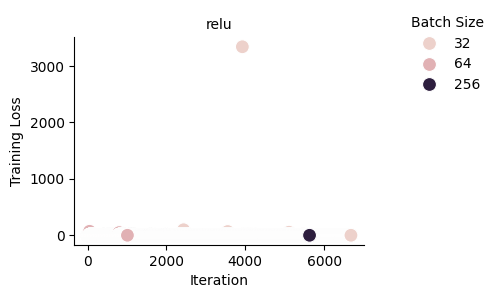

In [30]:
# plot number of iterations vs train loss for different models
# use a grid plot for each activation function by batch size
# use different hues for different batch functions
# and a heading for different activation functions
# Use values that exist in the data
#g = sns.FacetGrid(data[(data['learning_rate'] == 1e-5) & (data['num_processes'] == 4)], col="activation", margin_titles=True)
g = sns.FacetGrid(data[(data['learning_rate'] == 0.0001) & (data['num_processes'] == 4)], col="activation", margin_titles=True)
g.map_dataframe(sns.scatterplot, x='iteration', y='training_loss', hue='batch_size', s=100)
g.set_axis_labels("Iteration", "Training Loss")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
plt.show()